In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images = images[:1500]

In [4]:
masks = masks[:1500]

In [5]:
images.shape

(1500, 512, 512, 1)

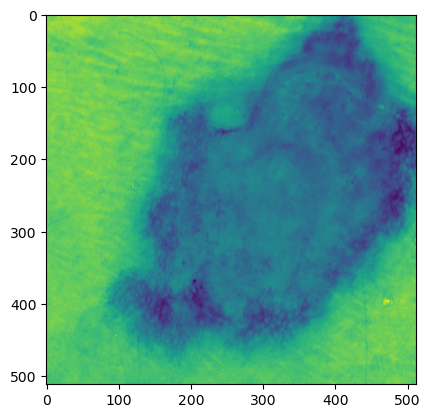

In [6]:
imshow(images[100])

In [7]:
masks.shape

(1500, 512, 512, 1)

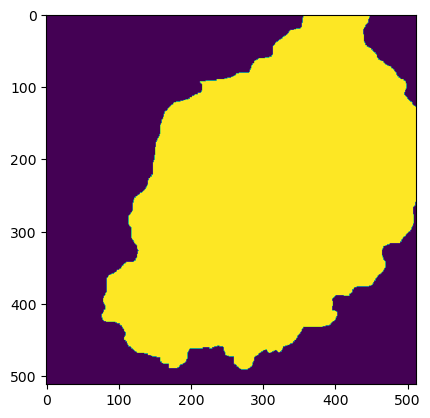

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpa6xnmdn7kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpyjxug5dwkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpyjxug5dwkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=15, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_15_lessData.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 20s 2s/step - loss: 0.4317 - dice_coeff: 0.5283 - val_loss: 0.3999 - val_dice_coeff: 0.5316
Epoch 2/100
5/5 [==============================] - 2s 514ms/step - loss: 0.4292 - dice_coeff: 0.4868 - val_loss: 0.3899 - val_dice_coeff: 0.5462
Epoch 3/100
5/5 [==============================] - 2s 513ms/step - loss: 0.4125 - dice_coeff: 0.5116 - val_loss: 0.3700 - val_dice_coeff: 0.5744
Epoch 4/100
5/5 [==============================] - 2s 519ms/step - loss: 0.4052 - dice_coeff: 0.5122 - val_loss: 0.3664 - val_dice_coeff: 0.5898
Epoch 5/100
5/5 [==============================] - 2s 511ms/step - loss: 0.3894 - dice_coeff: 0.5472 - val_loss: 0.3751 - val_dice_coeff: 0.5990
Epoch 6/100
5/5 [==============================] - 2s 516ms/step - loss: 0.4062 - dice_coeff: 0.5413 - val_loss: 0.3705 - val_dice_coeff: 0.5635
Epoch 7/100
5/5 [==============================] - 2s 507ms/step - loss: 0.4372 - dice_c

Testing the classifier...
Testing the discriminator...
3/3 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 50 machine labels.
Replacing 16 from 50 !
D_relabeled_ 16
point ids 16
Removed: 16 Filled: 16
TOOK 51.81466603279114 seconds
==== DONE LOOP 7 ====
******
Loop 8
Epoch 1/100
12/12 [==============================] - 4s 350ms/step - loss: 0.3721 - dice_coeff: 0.6249 - val_loss: 0.3246 - val_dice_coeff: 0.6244
Epoch 2/100
12/12 [==============================] - 4s 347ms/step - loss: 0.3454 - dice_coeff: 0.6364 - val_loss: 0.3305 - val_dice_coeff: 0.6505
Epoch 3/100
12/12 [==============================] - 4s 340ms/step - loss: 0.3431 - dice_coeff: 0.6508 - val_loss: 0.3464 - val_dice_coeff: 0.6421
Epoch 4/100
12/12 [==============================] - 4s 341ms/step - loss: 0.3169 - dice_coeff: 0.6832 - val_loss: 0.3028 - val_dice_coeff: 0.6746
Epoch 5/100
12/12 [==============================] - 4s 340ms/step - loss: 0.3071 - dice_coeff: 0.68

Epoch 2/100
17/17 [==============================] - 5s 321ms/step - loss: 0.2156 - dice_coeff: 0.7834 - val_loss: 0.2476 - val_dice_coeff: 0.7714
Epoch 3/100
17/17 [==============================] - 5s 322ms/step - loss: 0.2071 - dice_coeff: 0.7966 - val_loss: 0.2964 - val_dice_coeff: 0.7244
Epoch 4/100
17/17 [==============================] - 5s 322ms/step - loss: 0.2253 - dice_coeff: 0.7858 - val_loss: 0.3084 - val_dice_coeff: 0.7209
Epoch 5/100
17/17 [==============================] - 6s 328ms/step - loss: 0.2141 - dice_coeff: 0.7844 - val_loss: 0.2430 - val_dice_coeff: 0.7763
Model saved to: /tmp/tmpyjxug5dwkuc_unet2d/kuc_unet2d_13kuc_unet2d_model
History saved to: /tmp/tmpyjxug5dwkuc_unet2d/kuc_unet2d_history_13.pkl
Testing the classifier...
Testing the discriminator...
3/3 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 55 machine labels.
Replacing 18 from 55 !
D_relabeled_ 18
point ids 18
Removed: 18 Filled: 18
TOOK 93.6995108127594 s

In [16]:
R.classifier_scores # after 15 runs of GP2

[[0.3910057246685028, 0.5325228571891785],
 [0.3578055202960968, 0.5981411337852478],
 [0.36362388730049133, 0.5937490463256836],
 [0.33541157841682434, 0.6220437288284302],
 [0.3123284578323364, 0.6595028042793274],
 [0.29828062653541565, 0.6858347058296204],
 [0.351214736700058, 0.6370595097541809],
 [0.2890624701976776, 0.7071942090988159],
 [0.29662594199180603, 0.6894420981407166],
 [0.2910130023956299, 0.6884087920188904],
 [0.28140583634376526, 0.6907644867897034],
 [0.2560129165649414, 0.7658074498176575],
 [0.24498333036899567, 0.7238932251930237],
 [0.23610138893127441, 0.7888327240943909],
 [0.23725979030132294, 0.7732073664665222]]

In [17]:
R.discriminator_scores # after 15 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

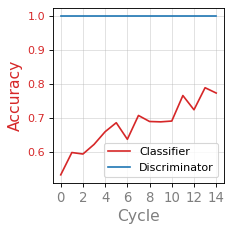

In [18]:
R.plot() # after 15 runs of GP2

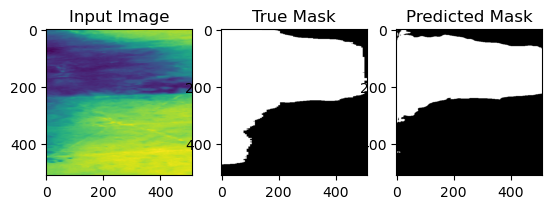

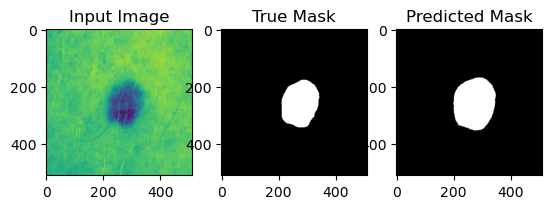

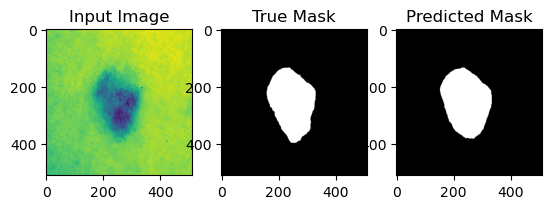

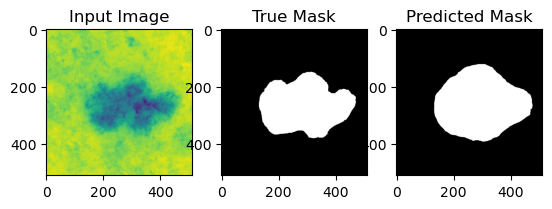

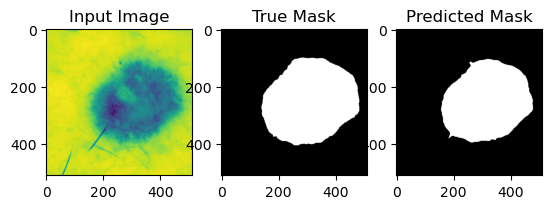

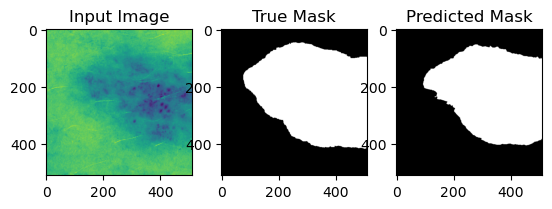

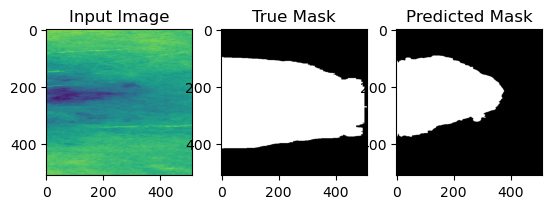

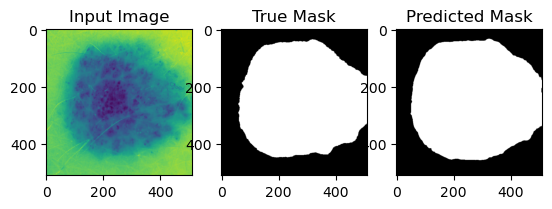

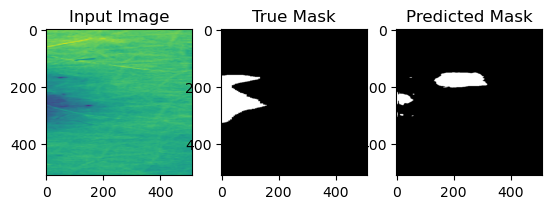

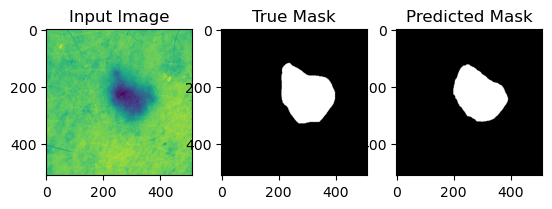

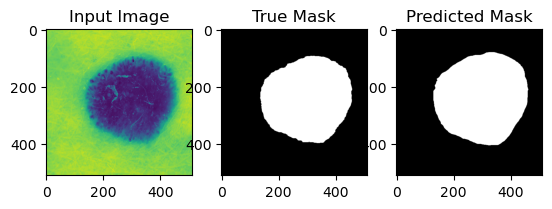

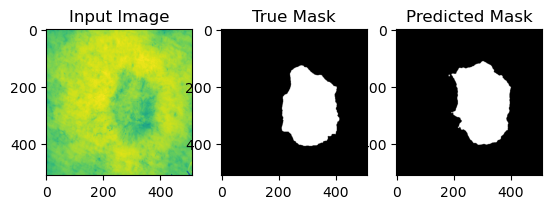

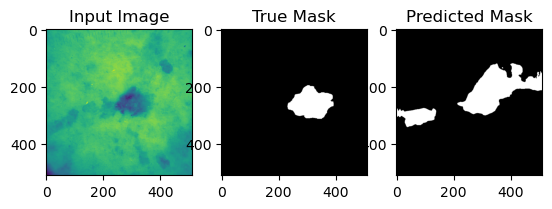

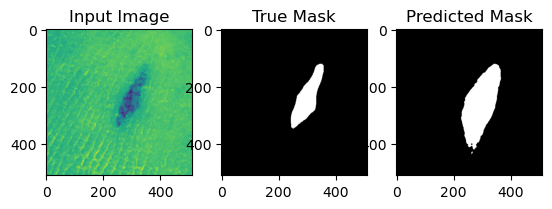

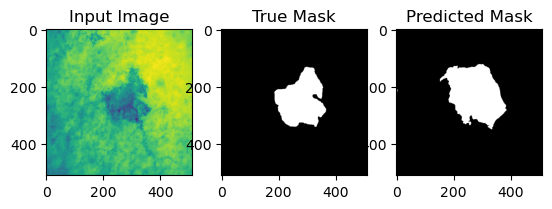

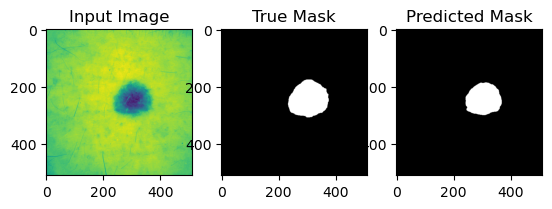

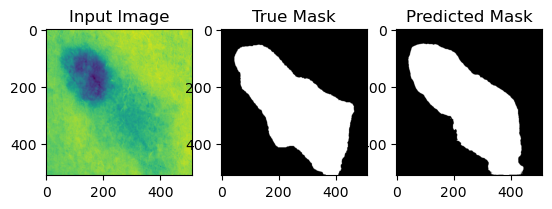

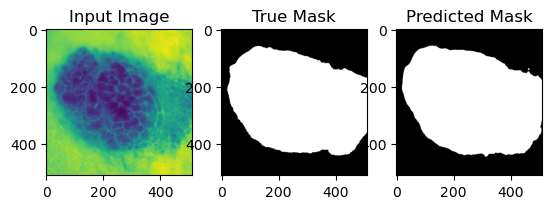

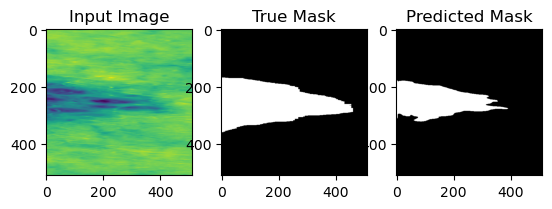

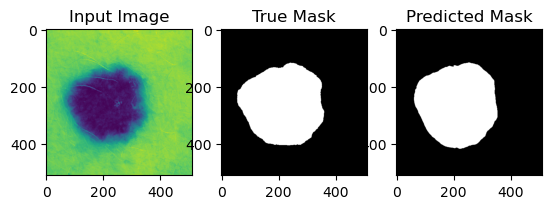

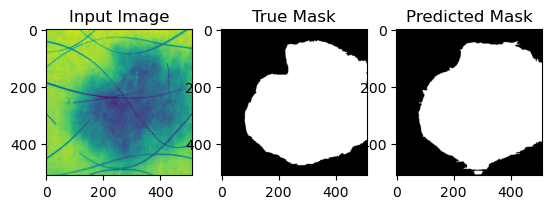

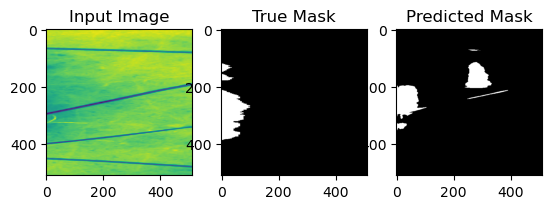

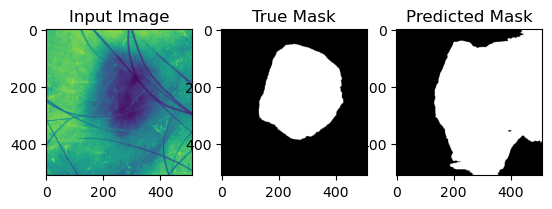

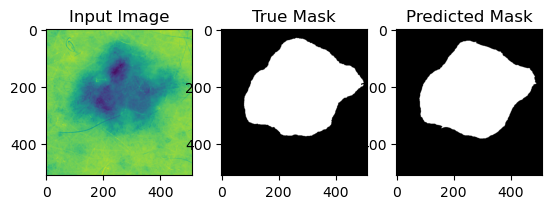

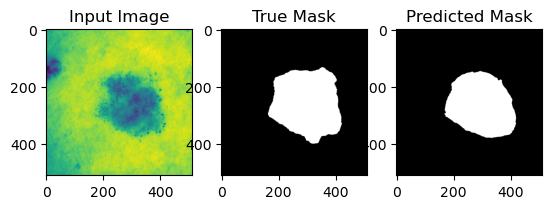

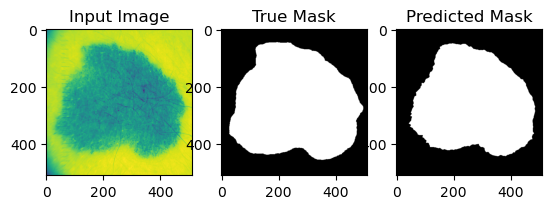

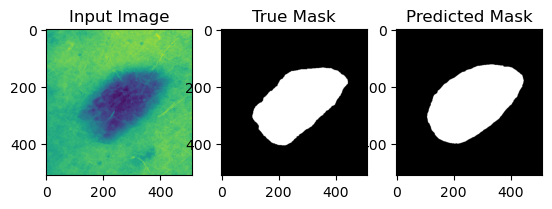

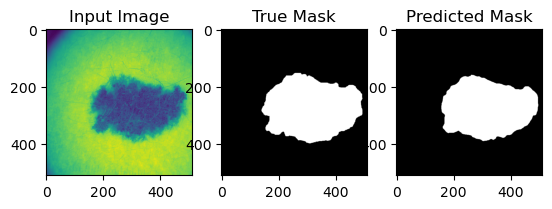

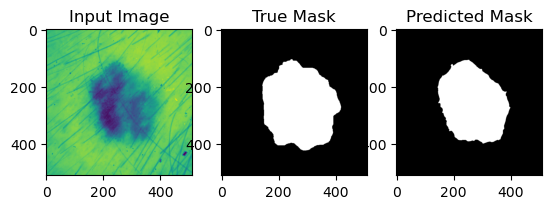

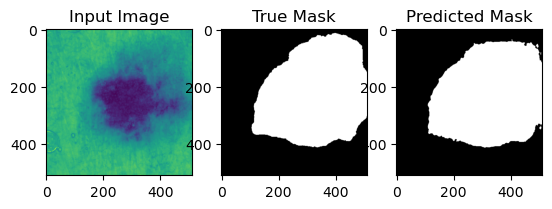

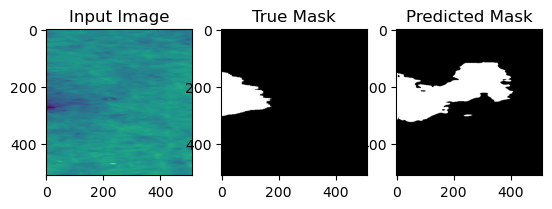

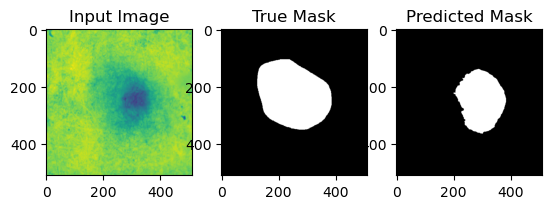

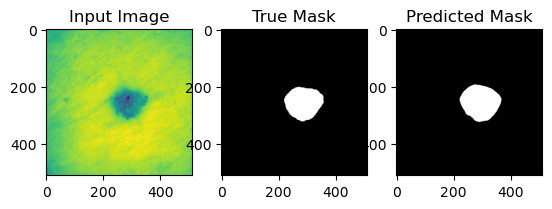

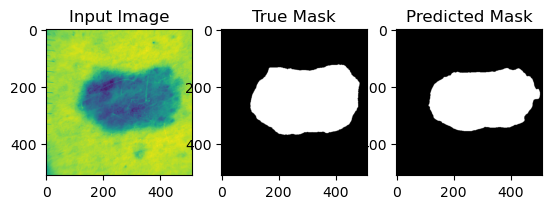

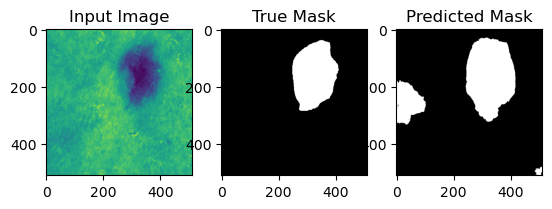

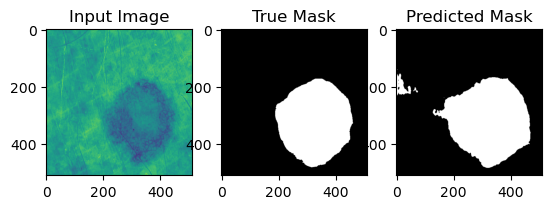

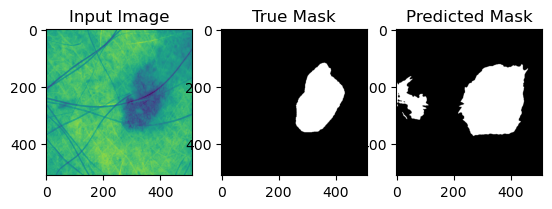

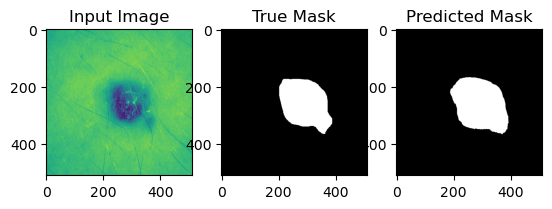

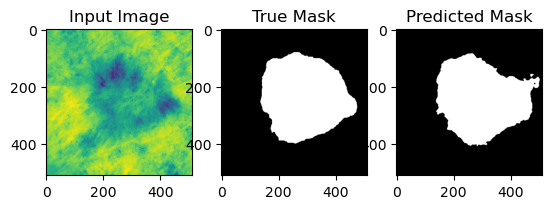

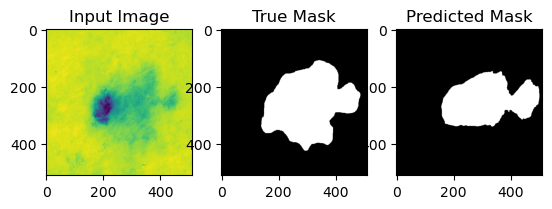

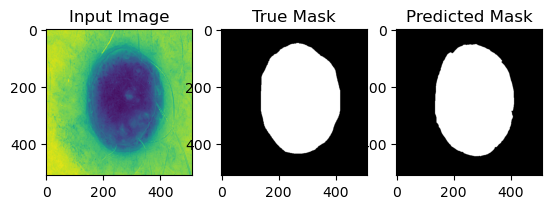

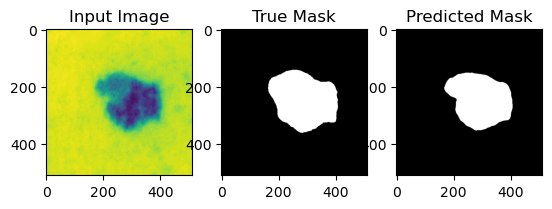

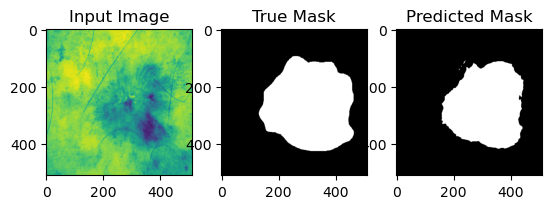

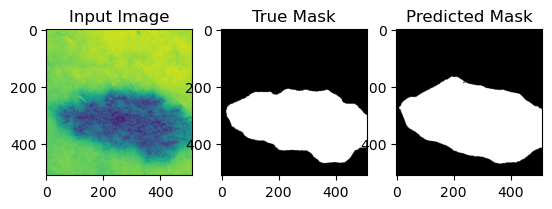

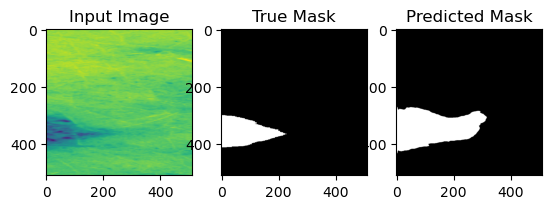

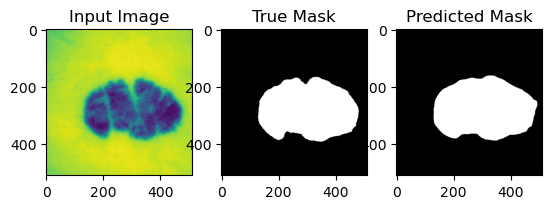

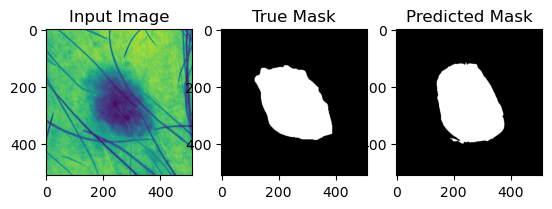

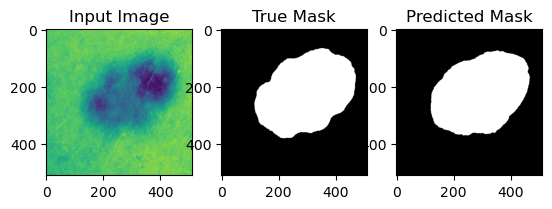

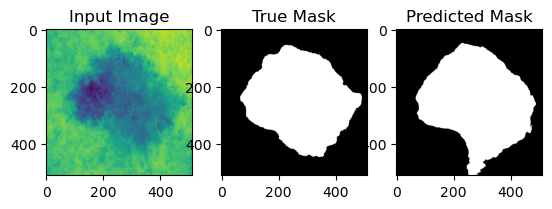

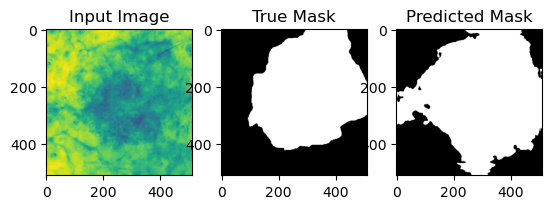

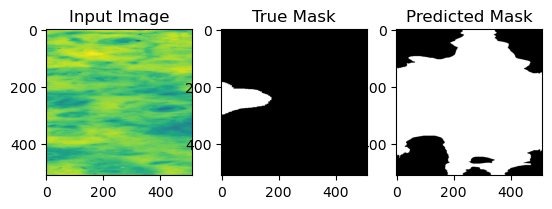

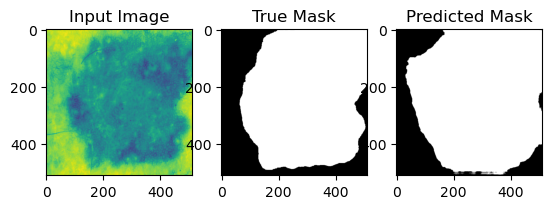

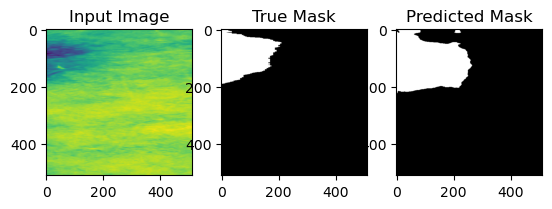

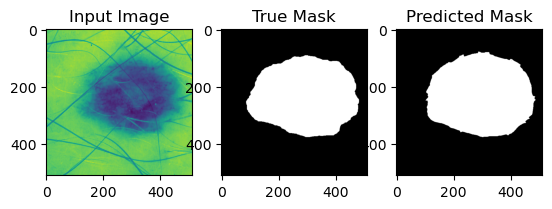

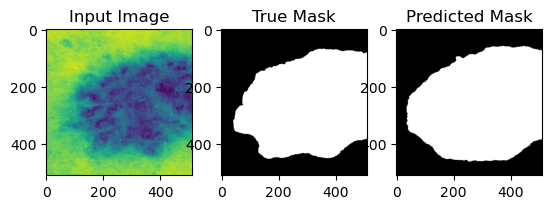

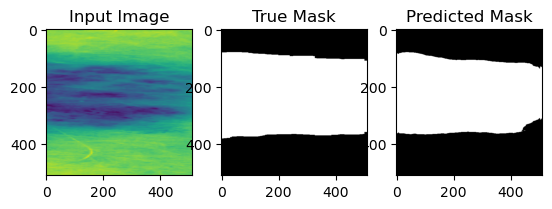

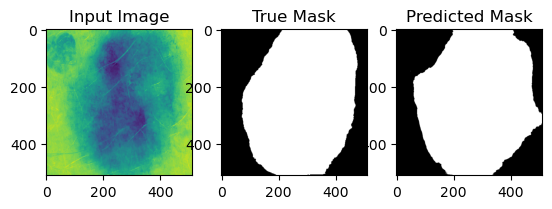

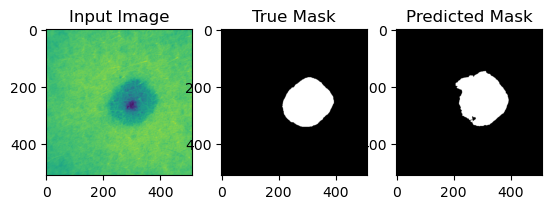

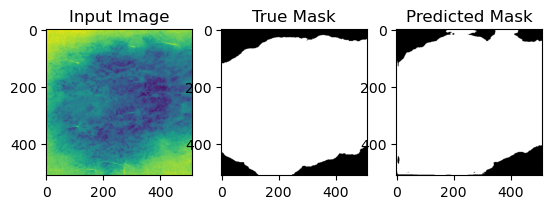

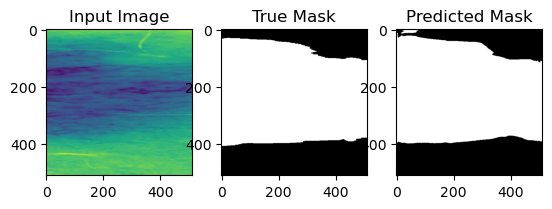

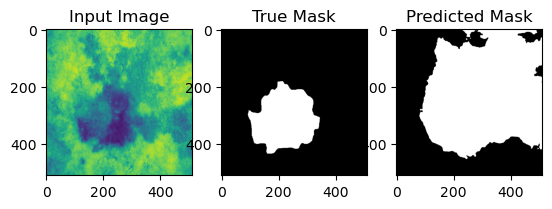

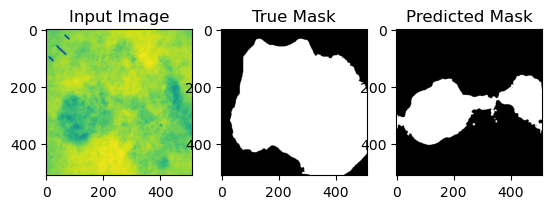

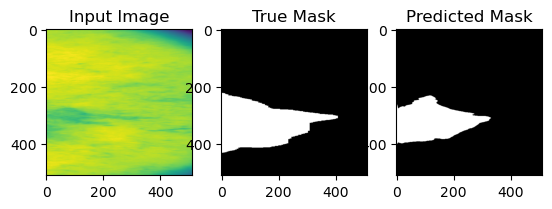

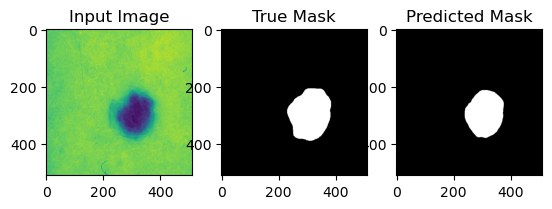

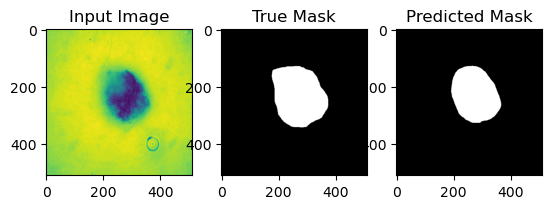

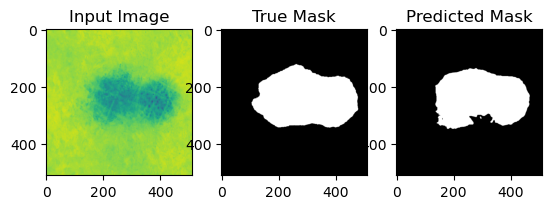

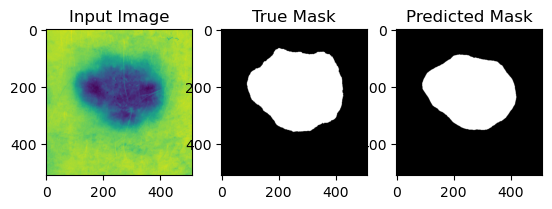

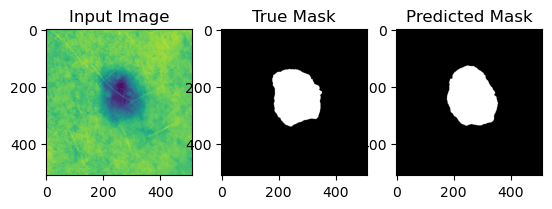

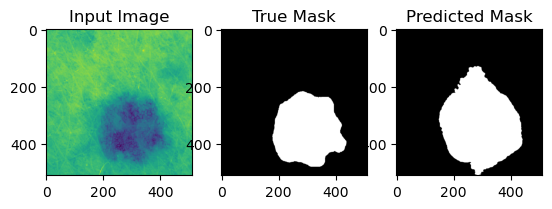

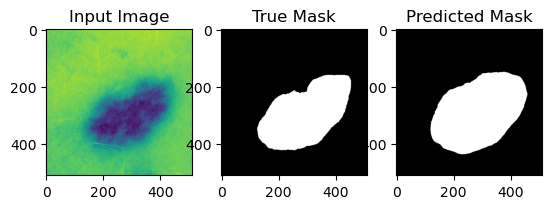

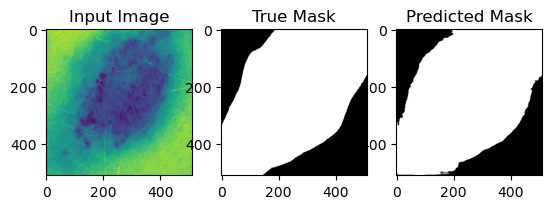

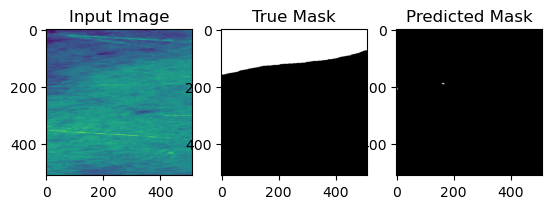

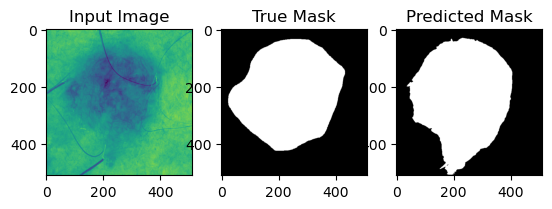

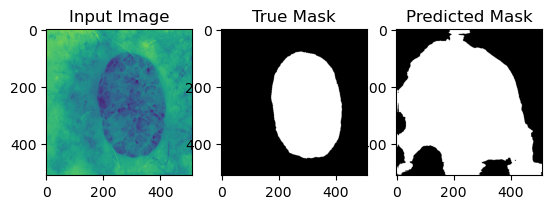

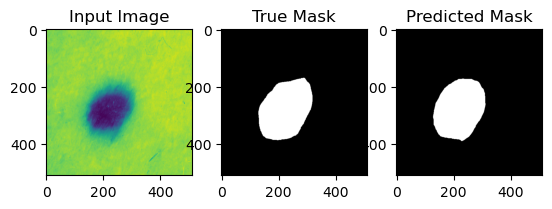

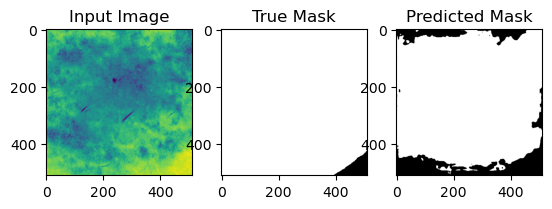

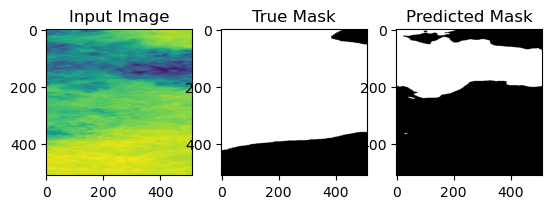

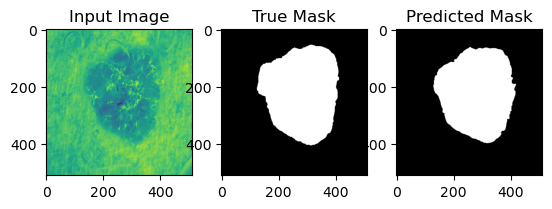

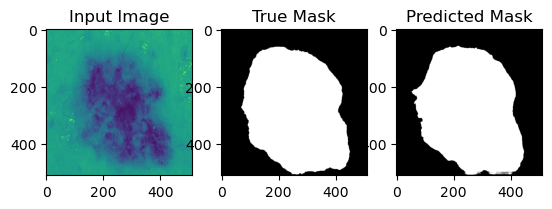

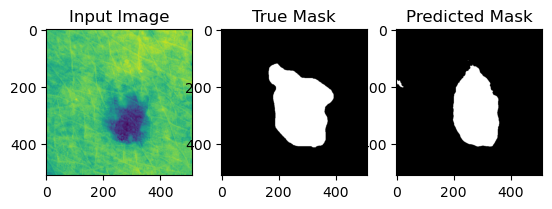

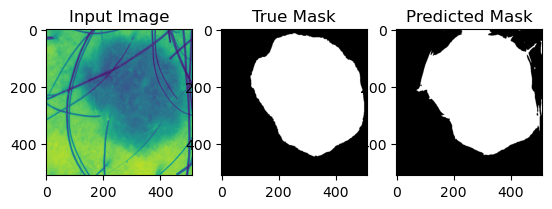

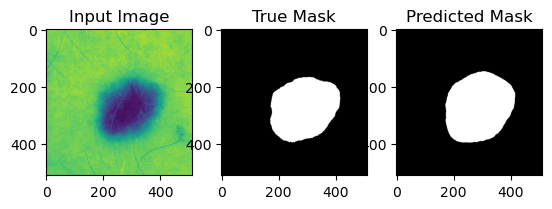

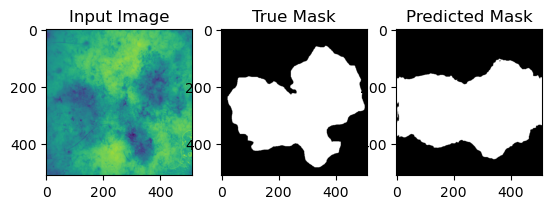

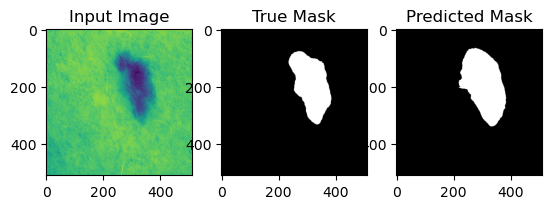

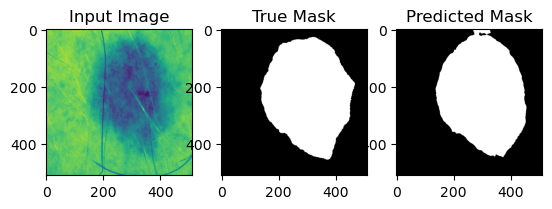

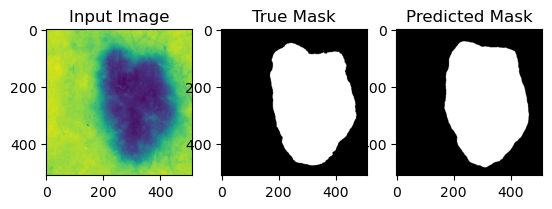

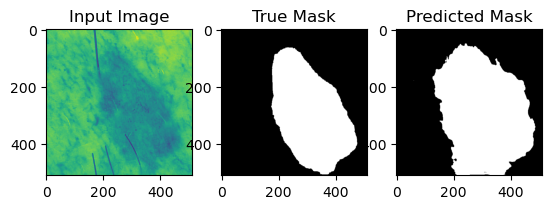

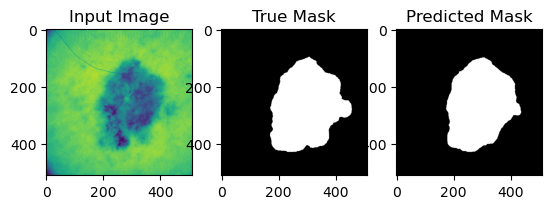

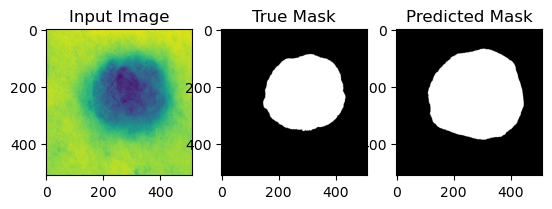

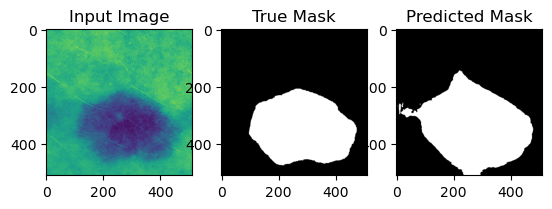

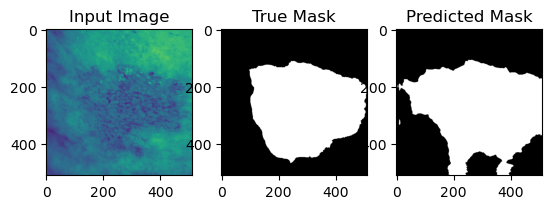

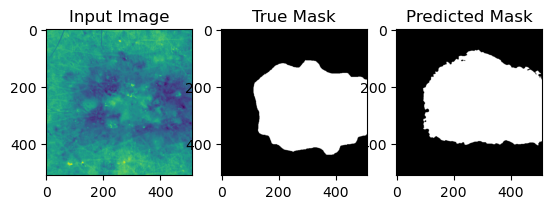

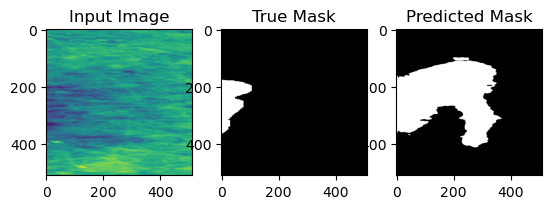

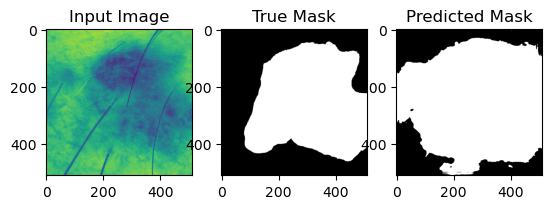

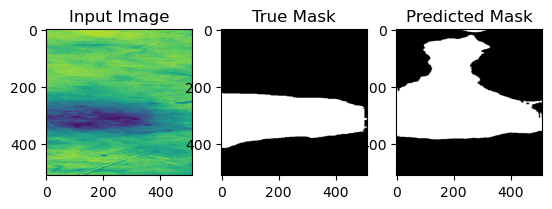

In [ ]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 15 runs of GP2